## Written by Mike Manookin

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

Early physiological studies made several key observations about the fundamental organization of neurons in the early visual system.

1. Some cells respond to increases in light intensity with an increase in spiking, while others respond to decreases in light intensity. These cells are termed ON and OFF cells, respectively.

2. The response properties of some cells initially appeared to be described well by modeling the early visual system as a linear, time-invariant system. For this reason, many researchers for the past six decades have relied heavily on periodic spatial and temporal stimuli (e.g., drifting gratings, shown below) to measure how different cell types and circuits encoded different aspects of the visual input.

Here, I will describe two different classical components of the linear filtering properties of cells in the early visual stream: spatial and temporal receptive fields. 

## Goals of this tutorial:
1. Gain familiarity with the basic descriptions of the spatial and temporal properties of neurons used by many vision researchers.
2. Understand that responses to periodic stimuli are a consequence of the shapes (or filtering properties) of spatiotemporal receptive fields.

# Spatial Receptive Fields

In [2]:
npts = 100
Min = -10
Max = 10
X = np.linspace(Min,Max,npts)
Y = np.linspace(Min,Max,npts)

# coordinate matrices from coordinate vectors
x, y = np.meshgrid(X, Y)

$$ \cos(Cx\cos{\phi} + Cy\sin{\phi}) $$
$$ C = \frac{\pi f}{Max} $$

where $\phi$ = orientation, $f$ = spatial frequency, $Max$ = maximum value of the space

In [3]:
#$$ \cos(\frac{x\pi f\cos(\phi)}{Max} + \frac{y\pi f\sin(\phi)}{Max}) $$

spatialFrequency = 6 # Spatial frequency 
orientation = np.pi/4 # Grating orientation in radians

xterm = (x / Max) * np.pi*spatialFrequency
yterm = (y / Max) * np.pi*spatialFrequency
theta = (xterm * np.cos(orientation)) + (yterm * np.sin(orientation))
grating = np.cos(theta)

(-0.5, 99.5, 99.5, -0.5)

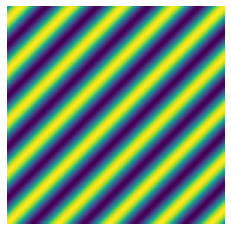

In [4]:
plt.imshow(grating)
plt.axis('off')

In [5]:
import matplotlib.animation as animation
from IPython.display import HTML

frameRate = 20 # Frame rate in frames/sec
temporalFrequency = 2 # Temporal frequency in cycles/sec
phase = 0

fig, ax = plt.subplots()

im = ax.imshow(grating, animated=True);
plt.axis('off');

# initialization function: plot the background of each frame
def init():
    im.set_data(grating)
    return [im]

# animation function, called sequentially
def updatefig(*args):
  global x, y, orientation, phase, frameRate, temporalFrequency, spatialFrequency, xMax
  phase += 1/frameRate * 2 * np.pi * temporalFrequency
  a = np.cos(phase + np.cos(orientation)*(x/Max*np.pi*spatialFrequency) + np.sin(orientation)*(y/Max*np.pi*spatialFrequency))
  im.set_array(a)
  return [im]

# Animate the grating.
ani = animation.FuncAnimation(fig, updatefig, init_func=init, frames=frameRate, interval=frameRate, blit=True);
plt.close()

HTML(ani.to_jshtml())

Go ahead and play with the grating parameters: spatial frequency, orientation, & temporal frequency. You can pretend you're recording spike responses to stimuli from cells. This was done decades ago and is still done today. 

Researchers presented these gratings and recorded the spike output of different cell types. They noticed that the spike output changed when the spatial frequency of the gratings was changed. Often, a cell's spike output looks a lot like this:

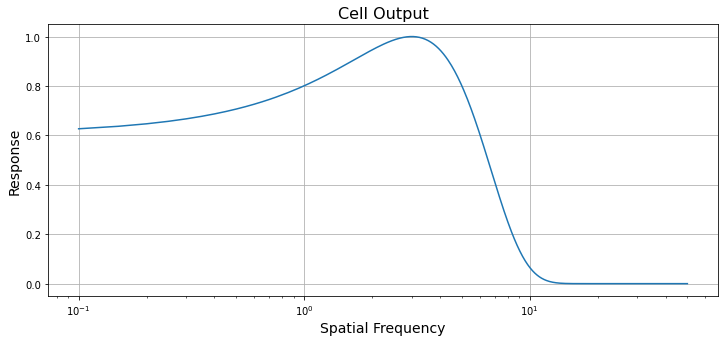

In [6]:
# Let's define a simple Gaussian bandpass function.
def gaussFun(x, A, xShift, sd):
  return A*np.exp( -((x-xShift)**2 / (2*sd**2)) )

# Define some spatial frequencies.
sf = np.linspace(0.1,50,1000)
centerFrequency = 3
bandwidth = 3

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

plt.plot(sf, gaussFun(sf,1,centerFrequency,bandwidth))
# Note: I'm showing the plots on a logarithmic x-axis out of convention.
# If you prefer to see it on a linear axis, comment out the following line!
ax.set_xscale('log')
ax.set_title('Cell Output',fontsize=16)
ax.set_xlabel('Spatial Frequency',fontsize=14)
ax.set_ylabel('Response',fontsize=14);
ax.grid()
plt.show()

# Creating a Difference of Gaussians (DoG) Spatial Receptive Field

### First, let's look at the "center" and "surround" components separately.

A single retinal ganglion neuron will have a cone-shaped visual receptive field comprised of all directions light can travel to possibly trigger activation of the cell. These visual receptive fields are comprised of a central disk, "center", and a concentric ring, "surround".

If we have an ON-center cell, light increasing in the center of its receptive field results in the increased firing of the cell. If only the surround is lighting up, there is a decrease in firing. If both center and surround are stimulated, there is only a mild response, as the center and surround have opposing effects on the cell's spike output.

Small receptive fields are stimulated by high spatial frequencies, aka finer details.

In [7]:
aCenter = 1.0        # Amplitude of center Gaussian
sigmaCenter = 1.0    # Standard deviation of center Gaussian
aSurround = 0.2      # Amplitude of opponent surround Gaussian
sigmaSurround = 4.0  # Standard deviation of opponent surround Gaussian

r = np.linspace(Min,Max,npts) # from grating example
center = gaussFun(r,aCenter,0,sigmaCenter)
surround = gaussFun(r,aSurround,0,sigmaSurround)

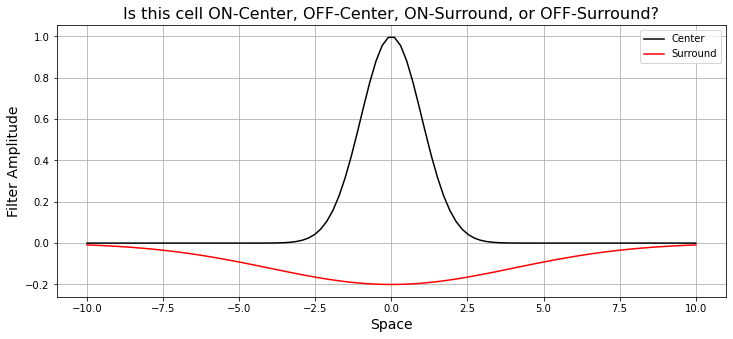

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

plt.plot(r, center,'k', label='Center')
plt.plot(r, -surround, 'r', label='Surround')
ax.set_title('Is this cell ON-Center, OFF-Center, ON-Surround, or OFF-Surround?',fontsize=16)
ax.set_xlabel('Space',fontsize=14)
ax.set_ylabel('Filter Amplitude',fontsize=14);
ax.legend()
ax.grid()
plt.show()

If you guessed "ON-Center", you're right! Because the receptive field center is tuned to increases in light intensity, it's an ON-center cell.

The spatial receptive field is modeled as the difference between the center and surround Gaussians:

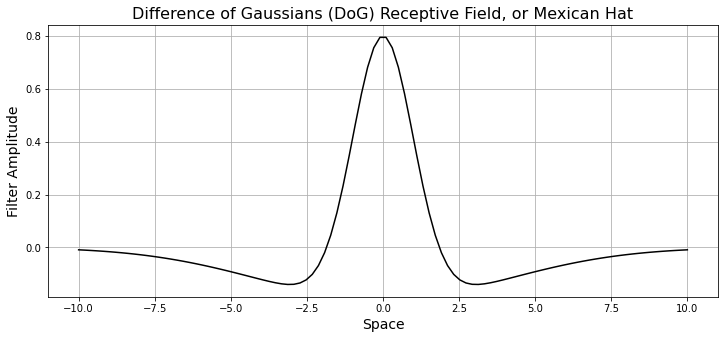

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

rf = center - surround

plt.plot(r, rf, 'k')
ax.set_title('Difference of Gaussians (DoG) Receptive Field, or Mexican Hat',fontsize=16)
ax.set_xlabel('Space',fontsize=14)
ax.set_ylabel('Filter Amplitude',fontsize=14);
ax.grid()
plt.show()

We can interpret this by saying that the cell responds best to an increase in light intensity over the center (0 on the x-axis) and/or to a decrease in light intensity on the tails (distances greater than 2 units from the central (zero) point).

There are two main ways to measure linear receptive fields:

1. As we've seen, you can present a series of moving gratings at a variety of spatial frequencies, orientations, contrasts, and temporal frequencies (we'll deal with temporal processing below).

2. Researchers realized that instead of running through all of the possible combinations of grating stimuli, you could obtain the same information (and potentially more) by using a single stimulus: white noise. It's "white" because neighboring regions in space and time are uncorrelated with one another. Some people lovingly refer to this stimulus as the "random garbage stimulus" for reasons you'll see when you play this animation. Essentially, you would play this stimulus to a cell for an extended period of time and record the spike responses of that cell. By doing some fairly straightforward analysis, you could then get the receptive-field structure.

In [10]:
%matplotlib inline

frameRate = 20 # Frame rate in frames/sec

fig, ax = plt.subplots()

im = ax.imshow(np.random.randn(30,30), animated=True)
plt.axis('off')

# initialization function: plot the background of each frame
def init():
    im.set_data(np.random.randn(30,30))
    return [im]

# animation function, called sequentially
def updatefig(*args):
  a = np.random.randn(30,30)
  im.set_array(a)
  return [im]

# Animate the grating.
ani = animation.FuncAnimation(fig, updatefig, init_func=init, frames=frameRate, interval=frameRate, blit=True)
plt.close()

# Play the grating.
HTML(ani.to_jshtml())

# Basic white-noise analysis:

1. Record cell's spike output to many presentations of the stimulus.
2. Keep track of the stimulus (~1 sec) preceding each spike.
3. Take the average of that stimulus for all spikes.
4. This is the spike-triggered average (STA). If you look at the frame ~50-100ms prior to spiking, it often looks like a difference-of-Gaussians. 

What is the consequence of this type of receptive-field structure?

So, how does this spatial receptive field relate to the bandpass spatial tuning function that researchers measure for visual neurons? One way (the hard way) to determine this would be to filter a bunch of gratings with the receptive field and see how the output changes as a function of the gratings' spatial frequencies. 

    *********** Please don't read past this point in this section if you are unfamiliar with basic Fourier analysis. ************

However, this is the same thing as the amplitude spectrum of the receptive field. Let's do it the easy way. 

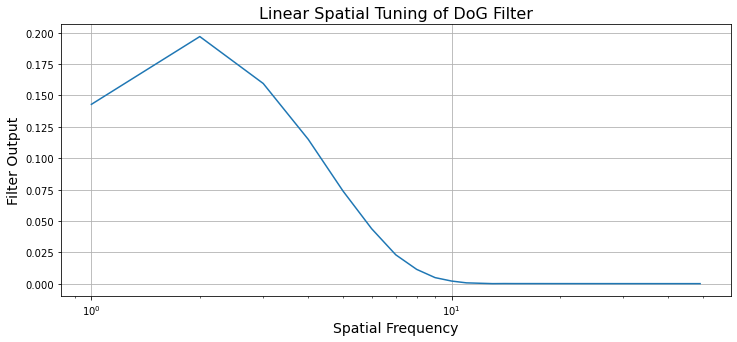

In [11]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

# Take the Fourier transform of the receptive field
N = len(rf)
yf = scipy.fftpack.fft(rf)

# Get the amplitude spectrum up to the Nyquist limit discarding the F0...
A = 2.0/N * np.abs(yf[1:N//2])
xf = np.linspace(1, len(A), len(A))

# Plot the predicted spatial tuning function for the receptive field. Notice the
# similarity between this and tuning functions recorded in cells.
plt.plot(xf, A)
ax.set_xscale('log')
ax.set_title('Linear Spatial Tuning of DoG Filter',fontsize=16)
ax.set_xlabel('Spatial Frequency',fontsize=14)
ax.set_ylabel('Filter Output',fontsize=14);
ax.grid()
plt.show()

# Temporal Receptive Fields

Another common manipulation was/is to record a cell's responses to gratings or other stimuli at a range of temporal frequencies. The goal of this experiment is to understand how different cells and circuits in the visual system filter temporal information. Similar to the spatial tuning functions, temporal tuning functions are typically bandpass.

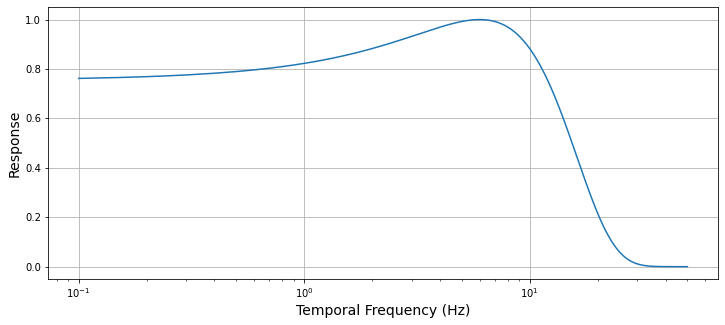

In [12]:
# Define some spatial frequencies.
tf = np.linspace(0.1,50,1000)
centerFrequency = 6
bandwidth = 8

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

plt.plot(tf, gaussFun(tf,1,centerFrequency,bandwidth))
ax.set_xscale('log')
ax.set_xlabel('Temporal Frequency (Hz)',fontsize=14)
ax.set_ylabel('Response',fontsize=14);
ax.grid()
plt.show()

Instead of the "spatial" receptive field, let's look at the temporal receptive field. This is often called the temporal filter.

We'll use a basic temporal filter function used by many retinal researchers. If you want to know specifics, please email me!

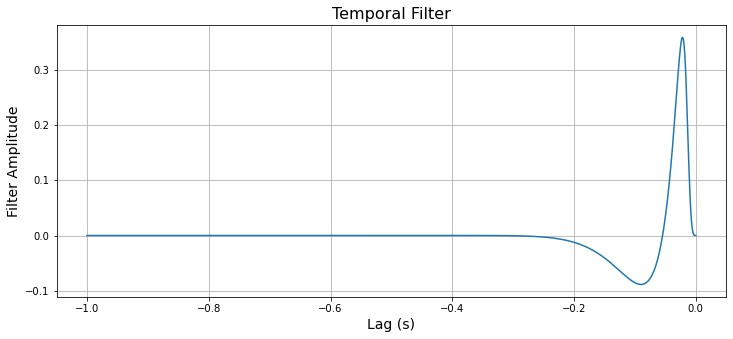

In [13]:
def temporalFun(t, p):
  return p[0] * (((t/p[1])**p[5])/(1+((t/p[1])**p[5]))) * np.exp(-((t/p[2]))) * np.cos(((2*np.pi*t)/p[3])+(2*np.pi*p[4]/360))

# Define temporal parameters.
tparams = [2.699101600403141, 0.017693386617024, 0.037119750110715, 0.586510918255136, 56.559161047519765, 4.001435007252049]


fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

t = np.linspace(0,1,1001)
tfilter = temporalFun(t, tparams)
plt.plot(-t, tfilter)
ax.set_title('Temporal Filter', fontsize=16)
ax.set_xlabel('Lag (s)', fontsize=14)
ax.set_ylabel('Filter Amplitude', fontsize=14)
ax.grid()
plt.show()

The way to read this is that the y-axis is light intensity and the x-axis is time. At time zero, the cell spiked, so if we look back at what caused that spike, there was a decrease in brightness beginning at about -200ms, followed by a rapid increase in brightness that peaked about 50ms before the spike occurred. 

Again, I'm showing the temporal filter for an ON cell. An OFF cell would be the negative of this...

So, how does this temporal filter relate to the bandpass temporal tuning function that researchers measure for visual neurons? As above, we could filter sinusoidal stimuli of many different temporal frequencies with this temporal filter and produce a linear estimate for the response of the cell as a function of temporal frequency... 

Or we could do it the easy way again...

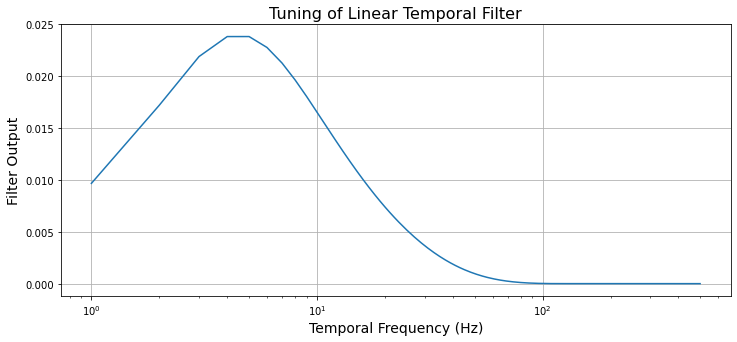

In [14]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

# Take the Fourier transform of the temporal filter
N = len(tfilter)
yf = scipy.fftpack.fft(tfilter)

# Get the amplitude spectrum up to the Nyquist limit. Discard the F0 component.
A = 2.0/N * np.abs(yf[1:N//2])
xf = np.linspace(1, len(A), len(A))

plt.plot(xf, A)
ax.set_xscale('log')
ax.set_title('Tuning of Linear Temporal Filter',fontsize=16)
ax.set_xlabel('Temporal Frequency (Hz)',fontsize=14)
ax.set_ylabel('Filter Output',fontsize=14);
ax.grid()
plt.show()

## Here are the key concepts I'd like you to take away from this tutorial:

1. Researchers have been using tools developed for linear systems analysis to study the visual system for ~6 decades. These tools include the widespread use of periodic (sinusoidal) and uncorrelated (white) stimuli. 

2. You will see both of these stimuli used extensively, but it is important to understand that they are really measuring two sides of the same coin: periodic stimuli such as gratings measure properties of the cell in the frequency domain, and white noise stimuli measure properties in the space and/or time domain.

3. The interpretation of data from these experiments rely on assumptions of linear processing in the circuitry prior to cell you're recording from. However, we now know that there are many nonlinear processes happening in space, time, and synaptic release machinery. This does not mean that linear systems analysis is completely invalidated, but (in my opinion) it should be viewed as one of many tools for studying neural systems. As with any tool it does certain tasks well, but not others. As is always the case in science, we need to be very careful about how we interpret the results of any single experiment/paradigm and bring as many techniques as possible to bear to answer a question.